In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import geopandas as gpd
 
from weavingspace import WeaveUnit
from weavingspace import Tiling

from weavingspace import tiling_utils

import shapely.affinity as affine

**Note: to speed up the tilings make the spacing larger (it's in metres) and set aspect to 1 (the latter will double the speed more or less).**

In [2]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

## Triaxial weave

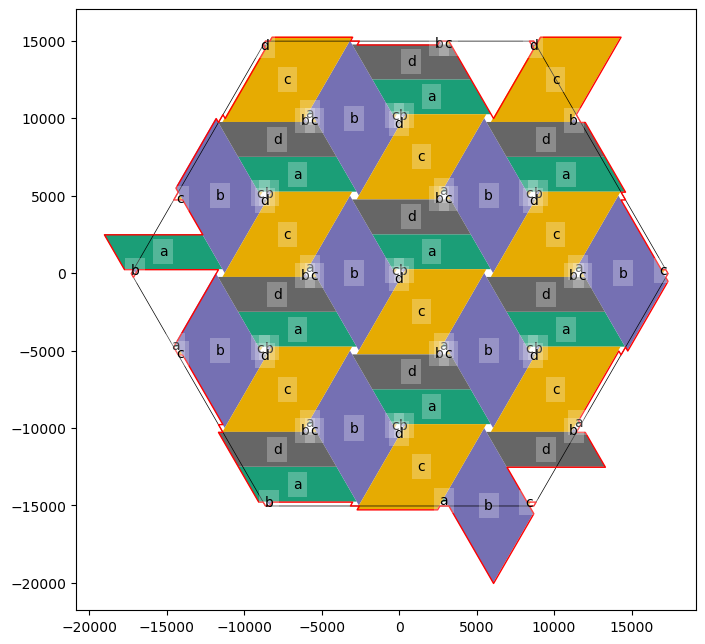

In [9]:
w2_a1 = WeaveUnit(
  weave_type = "cube", spacing = 5000, aspect = 0.9,
  strands = "(ad)|b|c", crs = ak.crs).transform_rotate(0).inset_tiles(0)
# w2_a09 = WeaveUnit(weave_type = "cube", spacing = 100, aspect = .9,
#                   strands = "a|b|c", crs = ak.crs, debug = True)
ax = w2_a1.plot(r = 0, figsize = (8, 8), show_reg_prototile = True, 
                show_ids = True)

In [4]:
from weavingspace._weave_grid import WeaveGrid

grid = WeaveGrid(3, (0, 120, 240))

<Axes: >

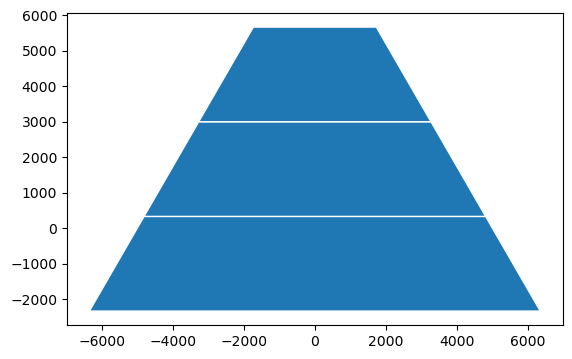

In [5]:
strands = gpd.GeoSeries(
  grid._get_cell_strands(0.8, (0, 0, 0), n_slices = 3))
strands.plot(ec = "w", lw = 1)

In [6]:
strands.geometry

0    POLYGON ((6350.853 -2333.333, -6350.853 -2333....
1    POLYGON ((4811.252 333.333, -4811.252 333.333,...
2    POLYGON ((3271.652 3000.000, -3271.652 3000.00...
dtype: geometry